## Reading the New-York Hotel Reviews from 2007 to 2008 
### In total 110 hotels were taken from the Opinion Based Entity Ranking Dataset
http://kavita-ganesan.com/opinion-based-entity-ranking/#.XpJaF4hKiUk 

In [0]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Data Loading

A subset of hotel review in New York was taken from the OpinRank Dataset to process the reviews via NLP flows and to form an predictive modelling of the overall rating score based on the review provided. The reviews are mostly from 2007 to 2009 year in the New-York city with 110 hotel in total (close to 40% of total number of hotel in dataset)

In total there are approximately 21000 review records and each individual hotel carry a rating score also provided in the datasets.

The review dataset was selected and loaded onto my github profile from which it was read into the notebook. 

In [0]:
import urllib.request
url ="https://raw.githubusercontent.com/abhishek-verma-26/Datasets/master/new-york-hotel-review-part1.csv"
file = urllib.request.urlopen(url)
#file = '/content/review/IMDB Dataset.csv'
a =[]

for line in file:
  a.append(str(line))
  #decoded_line = line.decode("utf-8")
  #print(decoded_line)

In [0]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import scipy.stats as stats
import seaborn as sns
import random
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
warnings.filterwarnings("ignore")

In [0]:
from collections import Counter
import nltk
import spacy
import re

# Download the English models of SpaCy
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


As can be seen the dataset has three separate information in each document; hotel name, date of review and the content of review. Looking at the data, we find many quirks and features that need to be preprocessed before feature engineering documents. 


In [0]:
# Converting dialog datafram into array for NLP processing
dialogs_arr = np.array(a)

# print the first 100 documents of dailogs
for ind in dialogs_arr[0:50]:
  print(ind)

b'3_west_club ,Feb-27-2009 ,"\t   The history the class the location... this hotel was an amazing part of my vacation The hotel\'s really part of the Republican National Women\'s Club, which made me apprehensive at first, but it was definitely worth it. The building filled with young d\xe9butantes and their mothers the last day we were there, which might have been the only bad thing that happened. The location was incredible, and our view was of St. Patrick\'s Cathedral and Radio City Music Hall. ",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n'
b'3_west_club ,Dec-31-2008 ,"\t   Awesome location and a great little find! We stayed at the 3 West Club in October 2008. It was a steal based on the location. We had been looking for weeks and could find nothing available that fit our budget. We had a group of 4 adults and 2 children (4&amp","7). We had the king suite and it was massive. There is a king size bed, a double pull-out (that was fairly comfortable) and they brought up a roll away for our old

## 2. Textual Cleaning 

Textual cleaning processing was done for the following items:
1. Expression of white spacing like \t,\r,\n
2. Quotes followed by backlash \'
3. Punctuations characters like dot, commas, exclamation, questionmark, etc.
4. White spacing removal



In [0]:
# Uisng Regular Expression to preform textual Cleaning
dialogs_arr_cln = []
cnt = 0
for ind in dialogs_arr:
  cnt = cnt + 1
  pattern2 = "[\?\"\!\[.\]]"
  text = re.sub(pattern2, " ", ind).replace("\\t","").replace("\\r","").replace("\\n","").replace("\\'","\'").replace("b'","").replace(',',"|",2).replace(',',"")
  dialogs_arr_cln.append(' '.join(text[:-2].split()))
  if cnt <= 30:
    print("Before: ",ind)
    print("After: ",' '.join(text[:-2].split()))

Before:  b'3_west_club ,Feb-27-2009 ,"\t   The history the class the location... this hotel was an amazing part of my vacation The hotel\'s really part of the Republican National Women\'s Club, which made me apprehensive at first, but it was definitely worth it. The building filled with young d\xe9butantes and their mothers the last day we were there, which might have been the only bad thing that happened. The location was incredible, and our view was of St. Patrick\'s Cathedral and Radio City Music Hall. ",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n'
After:  3_west_club |Feb-27-2009 | The history the class the location this hotel was an amazing part of my vacation The hotel's really part of the Republican National Women's Club which made me apprehensive at first but it was definitely worth it The building filled with young d\xe9butantes and their mothers the last day we were there which might have been the only bad thing that happened The location was incredible and our view was of St Patric

Additional the processed documents were stored in array with three features
1. Hotel Name
2. Date of Review
3. Review content

In [0]:
# Removing white spacing
dialogs_arr_cln2 = []
cnt  = 0
for ind in dialogs_arr_cln:
  dialogs_arr_cln2.append(ind.split("|"))
  if cnt <= 30:
    print(ind.split("|"))

['3_west_club ', 'Feb-27-2009 ', " The history the class the location this hotel was an amazing part of my vacation The hotel's really part of the Republican National Women's Club which made me apprehensive at first but it was definitely worth it The building filled with young d\\xe9butantes and their mothers the last day we were there which might have been the only bad thing that happened The location was incredible and our view was of St Patrick's Cathedral and Radio City Music Hall"]
['3_west_club ', 'Dec-31-2008 ', " Awesome location and a great little find We stayed at the 3 West Club in October 2008 It was a steal based on the location We had been looking for weeks and could find nothing available that fit our budget We had a group of 4 adults and 2 children (4&amp 7) We had the king suite and it was massive There is a king size bed a double pull-out (that was fairly comfortable) and they brought up a roll away for our oldest (our little one shared the king with my hubby and I) S

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Porting the review array into dataframe

In [0]:
# Importing Reviews in Pandas Dataframe
review_pd = pd.DataFrame(dialogs_arr_cln2, columns = ['Hotel','Date','Review'])
review_pd

,Hotel,Date,Review
0,3_west_club,Feb-27-2009,The history the class the location this hotel...
1,3_west_club,Dec-31-2008,Awesome location and a great little find We s...
2,3_west_club,Jul-15-2008,Location Can't Be Beat We recently stayed at ...
3,3_west_club,Jan-27-2008,Location location location Shhhhh - don't tel...
4,3_west_club,Sep-14-2007,Right in the middle Best location in New York...
...,...,...,...
21784,hotel_east_houston,Apr-24-2008,Small but Comfortable Hotel not too easy to f...
21785,hotel_east_houston,Apr-7-2008,With frequent trips to the area scheduled wou...
21786,hotel_east_houston,Mar-23-2008,Hotel Least Houston When I booked my stay I w...
21787,hotel_east_houston,Feb-18-2008,Hotel East Houston - a nice little NYC oasis ...


The document is parsed using Spacy nlp function and some more processing is done to simplify texts
1. Characters and expression such as \xf3, \xe0 \xe9
2. Numeric (digits, decimal numbers) or numeric alike works (single double etc) 
3. Normalization of lowercases
4. Non alphabetic characters (like emojis :))
5. Remove Stop words

There is no missing values generated in the dataframe hence no data cleaning is required after this step.

I also generated the word POS from refined list of words to be used in our modelling tests 

In [0]:
# Spacy Creating Document
nlp = spacy.load('en')

# all the processing work is done below, so it may take a while
for rev in review_pd['Review'] :
  review_doc = nlp(rev)
  review_without_stopwords = [token.lower_ for token in review_doc if not token.is_stop if not token.is_punct if not token.is_space if token.is_alpha]
  review_pos = [token.pos_ for token in review_doc if not token.is_stop if not token.is_punct if not token.is_space if token.is_alpha]
  review_pd.loc[review_pd['Review']==rev,'Review_Format'] = ' '.join(review_without_stopwords)
  review_pd.loc[review_pd['Review']==rev,'Review_Format_POS'] = ' '.join(review_pos)

In [0]:
review_pd

,Hotel,Date,Review,Review_Format,Review_Format_POS
0,3_west_club,Feb-27-2009,The history the class the location this hotel...,history class location hotel amazing vacation ...,NOUN NOUN NOUN NOUN ADJ NOUN NOUN PROPN PROPN ...
1,3_west_club,Dec-31-2008,Awesome location and a great little find We s...,awesome location great little find stayed west...,ADJ NOUN ADJ ADJ NOUN VERB PROPN PROPN PROPN N...
2,3_west_club,Jul-15-2008,Location Can't Be Beat We recently stayed at ...,location beat recently stayed west club wednes...,PROPN VERB ADV VERB PROPN PROPN PROPN PROPN NO...
3,3_west_club,Jan-27-2008,Location location location Shhhhh - don't tel...,location location location shhhhh tell best ho...,PROPN NOUN NOUN PROPN VERB PROPN NOUN NOUN PRO...
4,3_west_club,Sep-14-2007,Right in the middle Best location in New York...,right middle best location new york city right...,INTJ ADJ ADJ NOUN PROPN PROPN PROPN ADV SCONJ ...
...,...,...,...,...,...
21784,hotel_east_houston,Apr-24-2008,Small but Comfortable Hotel not too easy to f...,small comfortable hotel easy find cab driver i...,ADJ ADJ PROPN ADJ VERB NOUN NOUN NOUN ADV VERB...
21785,hotel_east_houston,Apr-7-2008,With frequent trips to the area scheduled wou...,frequent trips area scheduled stay size rooms ...,ADJ NOUN NOUN VERB VERB NOUN NOUN VERB ADJ NOU...
21786,hotel_east_houston,Mar-23-2008,Hotel Least Houston When I booked my stay I w...,hotel houston booked stay told nicest rooms fl...,PROPN PROPN VERB NOUN VERB ADJ NOUN NOUN VERB ...
21787,hotel_east_houston,Feb-18-2008,Hotel East Houston - a nice little NYC oasis ...,hotel east houston nice little nyc oasis new s...,PROPN PROPN PROPN ADJ ADJ PROPN NOUN ADJ ADJ N...


## 3. Adding Rating Table to the Hotels Review

The overall rating numbers are imported from another table and added to the existing review dataframe

In [0]:
# Fixing the hotel name 
for hotel in review_pd['Hotel']:
  review_pd.loc[review_pd['Hotel']==hotel,'Hotel_Fix'] = " ".join(hotel.replace("_"," ").split())

In [0]:
review_pd

,Hotel,Date,Review,Review_Format,Review_Format_POS,Hotel_Fix
0,3_west_club,Feb-27-2009,The history the class the location this hotel...,history class location hotel amazing vacation ...,NOUN NOUN NOUN NOUN ADJ NOUN NOUN PROPN PROPN ...,3 west club
1,3_west_club,Dec-31-2008,Awesome location and a great little find We s...,awesome location great little find stayed west...,ADJ NOUN ADJ ADJ NOUN VERB PROPN PROPN PROPN N...,3 west club
2,3_west_club,Jul-15-2008,Location Can't Be Beat We recently stayed at ...,location beat recently stayed west club wednes...,PROPN VERB ADV VERB PROPN PROPN PROPN PROPN NO...,3 west club
3,3_west_club,Jan-27-2008,Location location location Shhhhh - don't tel...,location location location shhhhh tell best ho...,PROPN NOUN NOUN PROPN VERB PROPN NOUN NOUN PRO...,3 west club
4,3_west_club,Sep-14-2007,Right in the middle Best location in New York...,right middle best location new york city right...,INTJ ADJ ADJ NOUN PROPN PROPN PROPN ADV SCONJ ...,3 west club
...,...,...,...,...,...,...
21784,hotel_east_houston,Apr-24-2008,Small but Comfortable Hotel not too easy to f...,small comfortable hotel easy find cab driver i...,ADJ ADJ PROPN ADJ VERB NOUN NOUN NOUN ADV VERB...,hotel east houston
21785,hotel_east_houston,Apr-7-2008,With frequent trips to the area scheduled wou...,frequent trips area scheduled stay size rooms ...,ADJ NOUN NOUN VERB VERB NOUN NOUN VERB ADJ NOU...,hotel east houston
21786,hotel_east_houston,Mar-23-2008,Hotel Least Houston When I booked my stay I w...,hotel houston booked stay told nicest rooms fl...,PROPN PROPN VERB NOUN VERB ADJ NOUN NOUN VERB ...,hotel east houston
21787,hotel_east_houston,Feb-18-2008,Hotel East Houston - a nice little NYC oasis ...,hotel east houston nice little nyc oasis new s...,PROPN PROPN PROPN ADJ ADJ PROPN NOUN ADJ ADJ N...,hotel east houston


In [0]:
url = 'https://raw.githubusercontent.com/abhishek-verma-26/Datasets/master/new-york-city-rating.csv'
rating_pd = pd.read_csv(url)
rating_pd

,doc_id,hotel_name,hotel_url,street,city,state,country,zip,class,price,num_reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,overall_ratingsource
0,usa_new york city_3_west_club,3 west club,http://www.tripadvisor.com/ShowUserReviews-g60...,3 west 51st st,new york city,ny,USA,10019,-1,-1,8,4.428571,4.428571,4.428571,5.000000,4.714286,0,4.600000
1,usa_new york city_414_hotel,414 hotel,http://www.tripadvisor.com/ShowUserReviews-g60...,414 w 46th st,new york city,ny,USA,10036,-1,-1,187,4.073171,3.987805,3.914634,4.646341,4.268293,0,4.178049
2,usa_new york city_6_columbus,6 columbus,http://www.tripadvisor.com/ShowUserReviews-g60...,6 columbus circle,new york city,ny,USA,10019,-1,-1,125,4.371429,3.838095,4.276190,4.742857,4.028571,0,4.251429
3,usa_new york city_60_thompson,60 thompson,http://www.tripadvisor.com/ShowUserReviews-g60...,60 thompson street,new york city,ny,USA,10012,-1,-1,168,4.219512,3.634146,3.975610,4.634146,3.378049,0,3.968293
4,usa_new york city_70_park_avenue_hotel_a_kimpt...,70 park avenue hotel a kimpton hotel,http://www.tripadvisor.com/ShowUserReviews-g60...,70 park avenue,new york city,ny,USA,10016,-1,-1,273,4.335079,3.916230,4.209424,4.486911,3.890052,0,4.167539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,usa_new york city_west_57th_street_by_hilton_club,west 57th street by hilton club,http://www.tripadvisor.com/ShowUserReviews-g60...,102 west 57th street,new york city,ny,USA,10019,-1,-1,18,4.875000,4.312500,3.812500,4.875000,3.500000,0,4.275000
256,usa_new york city_wingate_by_wyndham_manhattan...,wingate by wyndham manhattan midtown,http://www.tripadvisor.com/ShowUserReviews-g60...,235 west 35th street,new york city,ny,USA,10001,-1,-1,263,4.556522,4.343478,4.130435,4.360870,4.160870,0,4.310435
257,usa_new york city_wolcott_hotel,wolcott hotel,http://www.tripadvisor.com/ShowUserReviews-g60...,4 west 31st street,new york city,ny,USA,10001,-1,-1,342,3.729064,3.408867,3.472906,4.512315,3.862069,0,3.797044
258,usa_new york city_woogo_central_park,woogo central park,http://www.tripadvisor.com/ShowUserReviews-g60...,240 west 73rd street,new york city,ny,USA,10023,-1,-1,163,2.965517,3.137931,2.620690,4.241379,3.344828,0,3.262069


In [0]:
# Adding rating_score to the existing dataframe
for htl in rating_pd['hotel_name']:
  #print (htl)
  cond1= (review_pd['Hotel_Fix'] == htl)
  cond2= (rating_pd['hotel_name'] == htl)
  score = list(rating_pd.loc[cond2,'overall_ratingsource'])
  #print (score[0])
  review_pd.loc[cond1,'rating_score'] = score

In [0]:
review_pd

,Hotel,Date,Review,Review_Format,Review_Format_POS,Hotel_Fix,rating_score
0,3_west_club,Feb-27-2009,The history the class the location this hotel...,history class location hotel amazing vacation ...,NOUN NOUN NOUN NOUN ADJ NOUN NOUN PROPN PROPN ...,3 west club,4.600000
1,3_west_club,Dec-31-2008,Awesome location and a great little find We s...,awesome location great little find stayed west...,ADJ NOUN ADJ ADJ NOUN VERB PROPN PROPN PROPN N...,3 west club,4.600000
2,3_west_club,Jul-15-2008,Location Can't Be Beat We recently stayed at ...,location beat recently stayed west club wednes...,PROPN VERB ADV VERB PROPN PROPN PROPN PROPN NO...,3 west club,4.600000
3,3_west_club,Jan-27-2008,Location location location Shhhhh - don't tel...,location location location shhhhh tell best ho...,PROPN NOUN NOUN PROPN VERB PROPN NOUN NOUN PRO...,3 west club,4.600000
4,3_west_club,Sep-14-2007,Right in the middle Best location in New York...,right middle best location new york city right...,INTJ ADJ ADJ NOUN PROPN PROPN PROPN ADV SCONJ ...,3 west club,4.600000
...,...,...,...,...,...,...,...
21784,hotel_east_houston,Apr-24-2008,Small but Comfortable Hotel not too easy to f...,small comfortable hotel easy find cab driver i...,ADJ ADJ PROPN ADJ VERB NOUN NOUN NOUN ADV VERB...,hotel east houston,4.051613
21785,hotel_east_houston,Apr-7-2008,With frequent trips to the area scheduled wou...,frequent trips area scheduled stay size rooms ...,ADJ NOUN NOUN VERB VERB NOUN NOUN VERB ADJ NOU...,hotel east houston,4.051613
21786,hotel_east_houston,Mar-23-2008,Hotel Least Houston When I booked my stay I w...,hotel houston booked stay told nicest rooms fl...,PROPN PROPN VERB NOUN VERB ADJ NOUN NOUN VERB ...,hotel east houston,4.051613
21787,hotel_east_houston,Feb-18-2008,Hotel East Houston - a nice little NYC oasis ...,hotel east houston nice little nyc oasis new s...,PROPN PROPN PROPN ADJ ADJ PROPN NOUN ADJ ADJ N...,hotel east houston,4.051613


In [0]:
from google.colab import drive 
drive.mount('/content/gdrive') 
review_pd.to_csv('nlp_hotel_review_processed_dataframe.csv')
!cp nlp_hotel_review_processed_dataframe.csv "/content/gdrive/My Drive/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 4. Exploratory Data Analysis

### 1. Percentage Distribution of Rating
On exploring the histogram of rating, we find a normal distribuetd curve with the mean rating roughly centered around 4 with a spread of plus minus one. We will model this rating based on the review comments

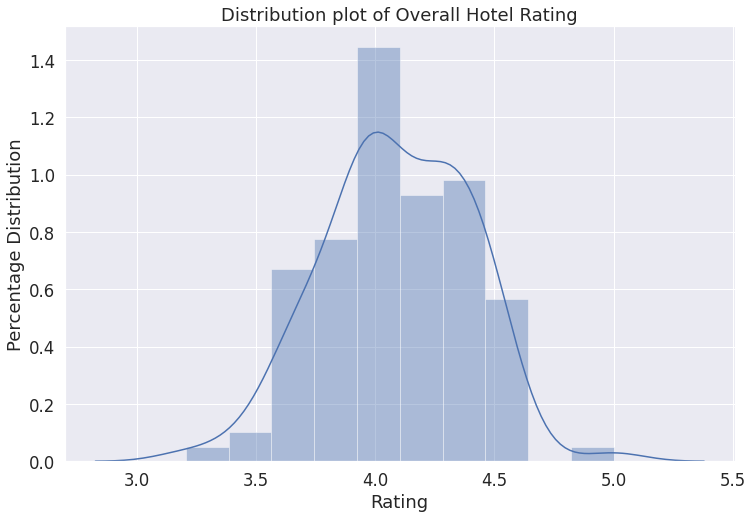

In [0]:
review_pd['rating_score'].unique()
#rating_pd['hotel_name'][0]
plt.figure(figsize=(12,8))
sns.distplot(review_pd['rating_score'].unique())
plt.title("Distribution plot of Overall Hotel Rating")
plt.xlabel('Rating')
plt.ylabel('Percentage Distribution')
plt.show()

## 2. Grammer Distribution

I explore the distribution of token POS in the reviews. I find major of token distribution in adjectives, noun, proper noun, verbs. Almost all the distribution are asymetric in nature 

In [0]:
# utility function to calculate how frequently words appear in the text
def word_frequencies(text):
    
    # build a list of words
    # strip out punctuation
    words = []
    for token in text:
        if not token.is_punct:
            words.append(token.text)
            
    # build and return a Counter object containing word counts
    return Counter(words)

## 5. Feature Engineering 
### 1. Bag of Word Approach

Vectorizing the tokens in BOW fashion, with the current reviews we get 35980 columns

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word')
X = vectorizer.fit_transform(review_pd["Review_Format"])
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
#sentences = pd.concat([bow_df, sentences[["text", "author"]]], axis=1)
#sentences.head(20)

In [0]:
bow_df

,aa,aaa,aaaaaaaaaahhhhh,aaaetc,aadequate,aagin,aall,aamazing,aan,aand,aare,aargh,aarp,ab,aback,abad,abandon,abandoned,abandonned,abatement,abatoir,abbey,abbiamo,abble,abbordabili,abbot,abbott,abbrasive,abbreviated,abc,abcd,abd,abdomen,abduhl,abdul,abeille,aber,abercrombie,aberdeen,aberration,...,zentrales,zentrum,zephyr,zepoli,zero,zerobrooklyn,zerowe,zeus,zey,zeytuna,zie,ziegfeld,ziggies,ziggy,zillion,zillions,zimmer,zimmern,zip,ziplocked,zipped,zipping,zippy,zircon,zishan,zombies,zona,zone,zonked,zoo,zoom,zoomed,zooming,zoothree,zozo,zu,zucker,zuckers,zum,zyxel
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21784,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21785,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21786,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21787,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Vectorizing the token POS to be tested in modelling phase with total of 15 columns

In [0]:
vectorizer = CountVectorizer(analyzer='word')
X = vectorizer.fit_transform(review_pd["Review_Format_POS"])
pos_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
pos_df

,adj,adp,adv,cconj,det,intj,noun,num,part,pron,propn,punct,sconj,sym,verb
0,6,0,1,0,0,0,12,0,0,0,11,0,0,0,2
1,17,0,3,0,0,0,39,0,0,0,5,0,0,0,12
2,27,0,4,0,0,0,75,0,0,0,20,0,0,0,31
3,3,0,0,0,0,0,12,0,0,0,5,0,0,0,5
4,4,0,1,0,0,1,4,0,0,0,7,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21784,21,0,6,0,0,0,38,0,0,0,8,0,0,0,20
21785,12,1,8,0,0,0,78,0,0,0,6,0,0,0,35
21786,8,0,5,0,0,0,47,0,0,0,6,0,1,0,31
21787,35,0,7,0,0,0,95,0,0,0,16,0,1,0,24


<Figure size 864x576 with 0 Axes>

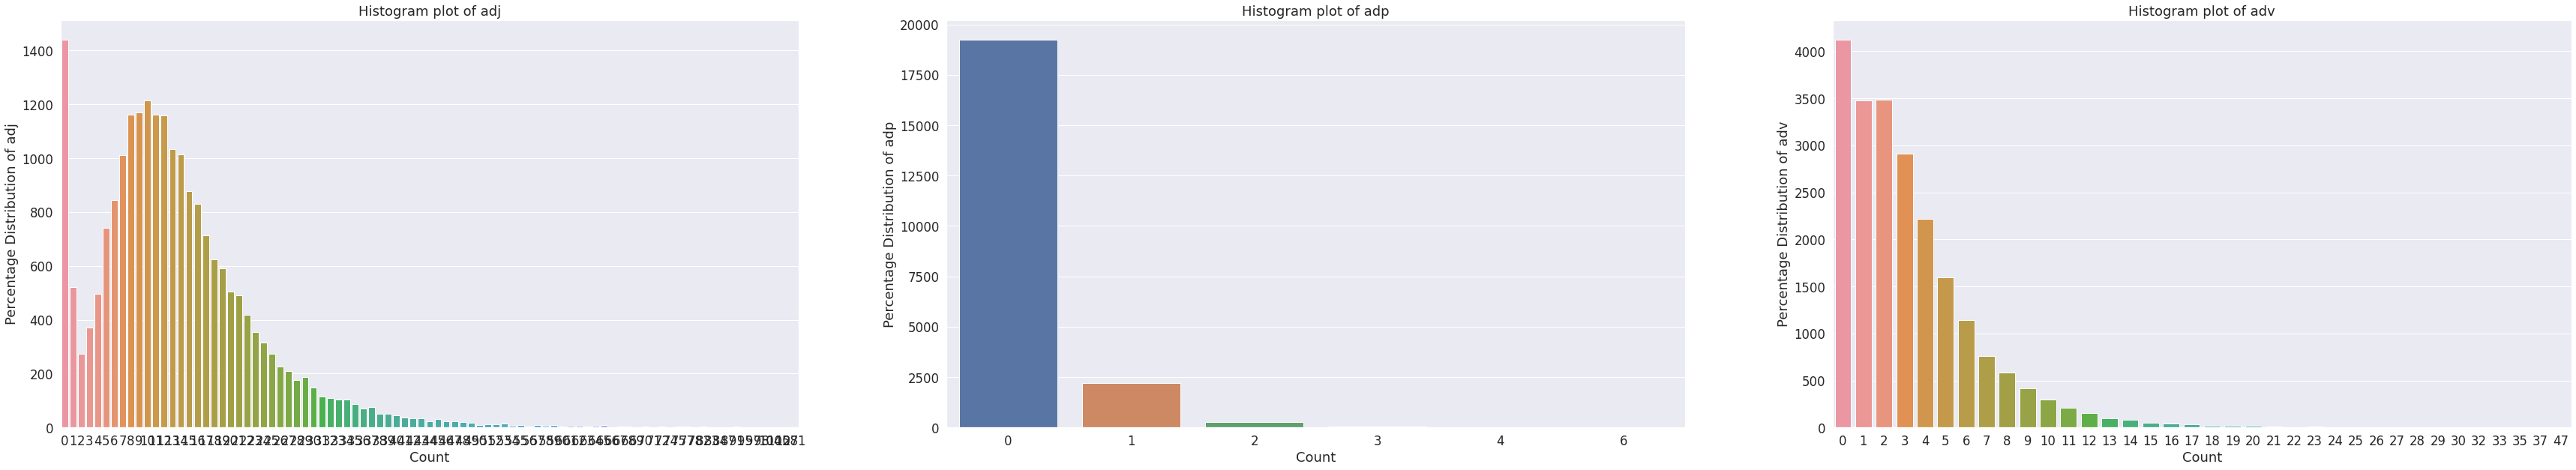

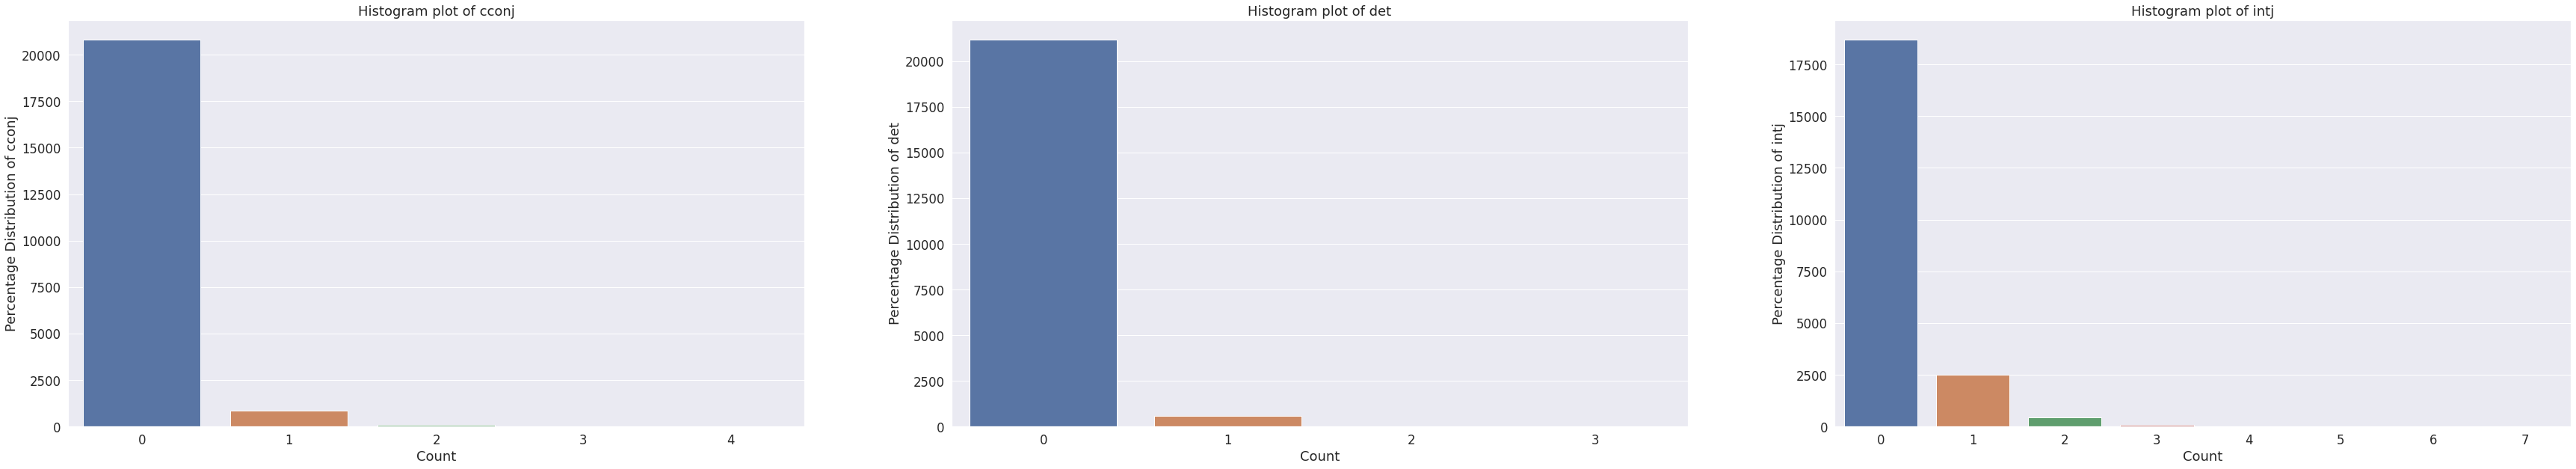

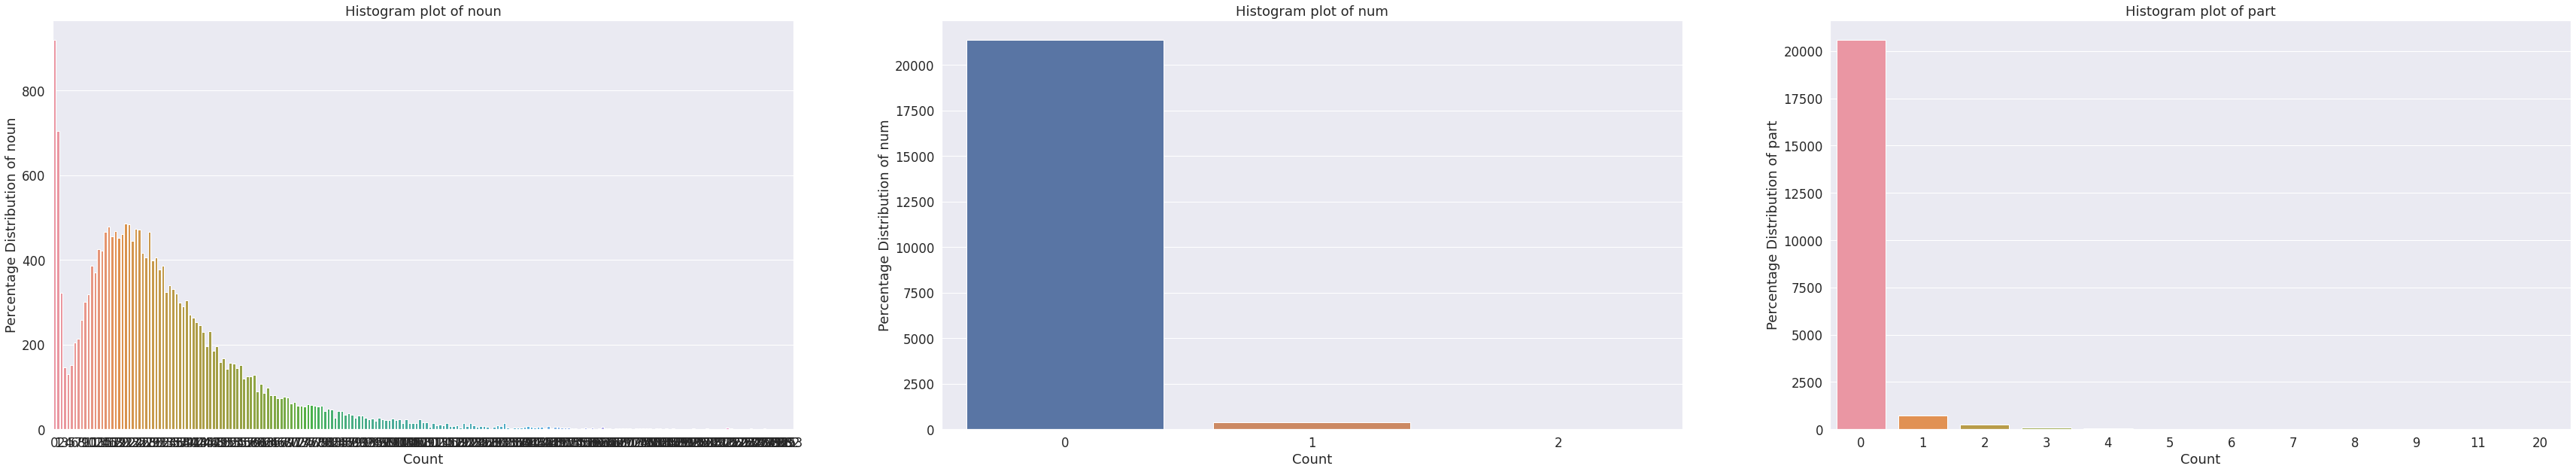

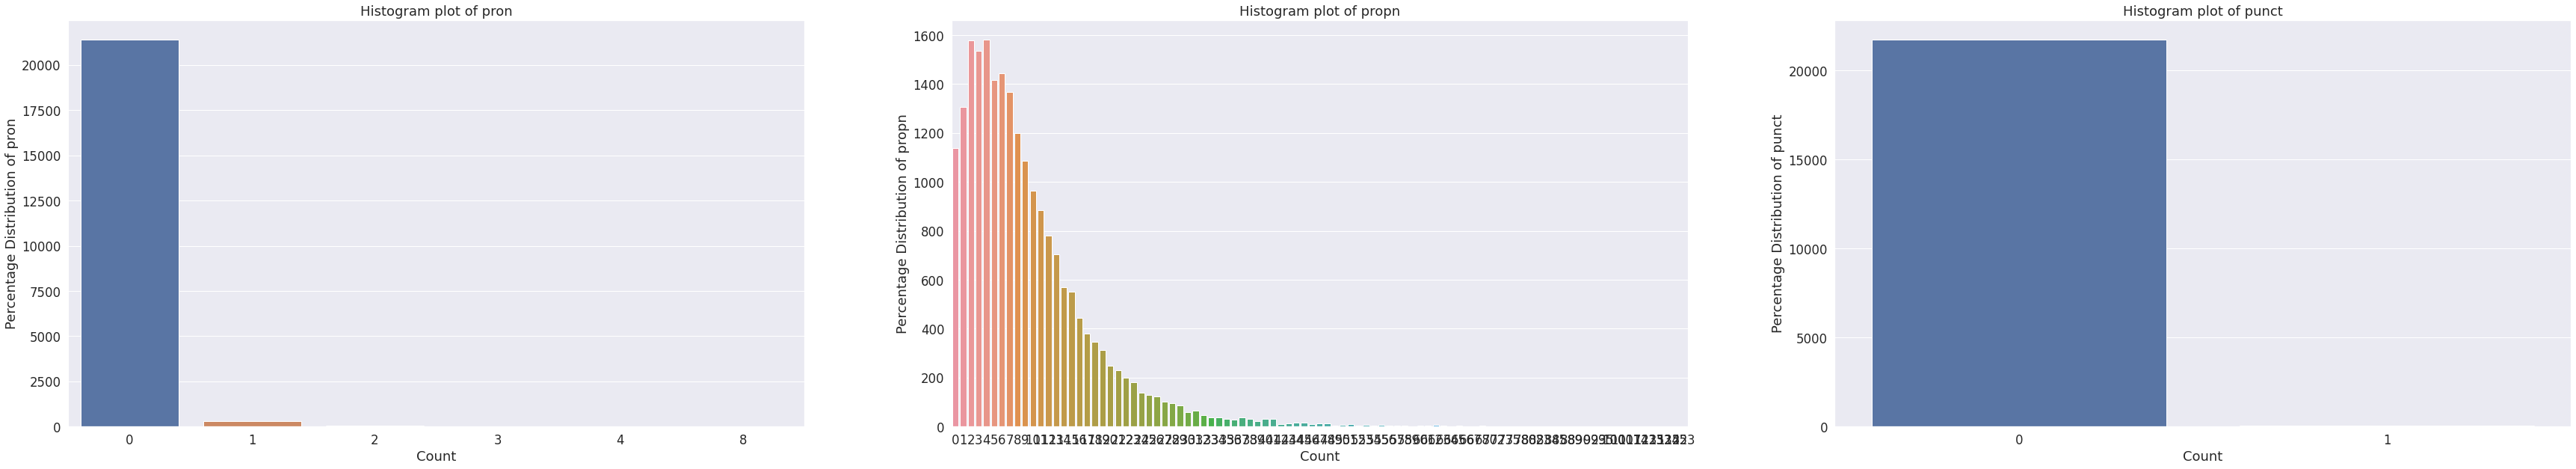

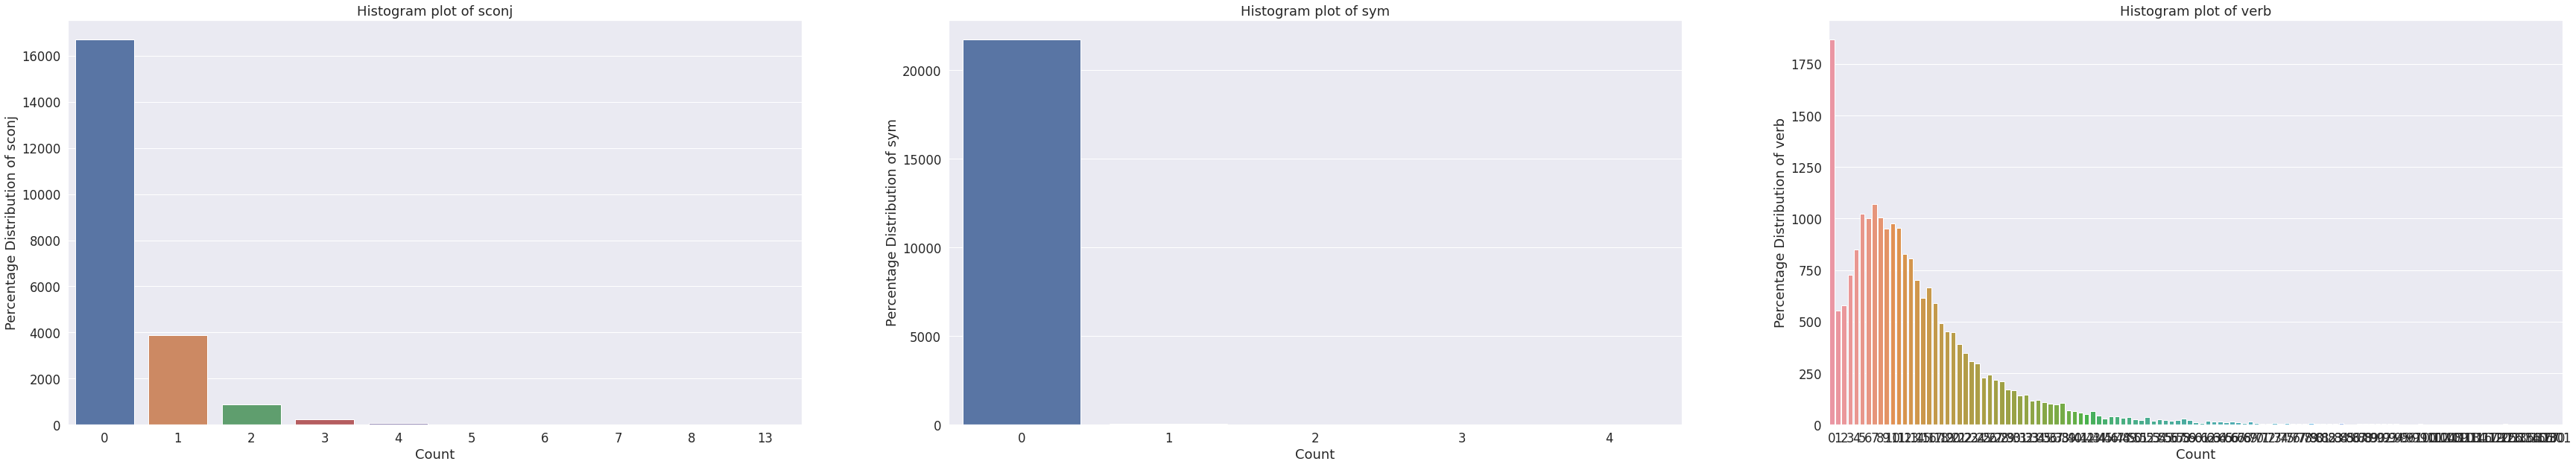

In [0]:
plt.figure(figsize=(12,8))

cnt = 0
for col in pos_df.columns :
  cnt += 1
  if cnt ==1 :
    plt.figure(figsize=(60,10))
  plt.subplot(1, 3, cnt)
  sns.countplot(pos_df[col])
  plt.title("Histogram plot of "+col)
  plt.xlabel('Count')
  plt.ylabel('Percentage Distribution of '+col)
  if cnt ==3 :
    plt.show()
    cnt=0

### 2. TF-IDF Approach

We also apply TFIDF approach to the data with the following features

max_df=0.5: This drops words that occur in more than half the documents.

min_df=2: This makes the vectorizer only use words that appear at least twice.

use_idf=True: This makes the vectorizer use inverse document frequencies in 
weighting.

norm=u'l2': This applies a correction factor so that longer and shorter 
documents get treated equally.

smooth_idf=True: This adds 1 to all document frequencies, as if an extra document existed that used every word once. This prevents divide-by-zero errors.




In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, lowercase=True, use_idf=True, norm=u'l2', smooth_idf=True)
# applying the vectorizer
X = vectorizer.fit_transform(review_pd["Review_Format"])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [0]:
tfidf_df

,aa,aaa,aarp,aback,abandoned,abbott,abc,abdomen,abeille,aber,abercrombie,abgewohnt,abilities,ability,abit,ablaze,able,aboard,aboslutely,abotu,abou,abound,abounds,abour,abrasive,abroad,abrupt,abruptly,absence,absent,absoloutely,absoloutly,absolut,absolute,absolutely,absolutey,absolutley,absolutly,absorb,absorbed,...,youth,youthful,youths,youtube,ypu,yr,yrs,yuck,yucky,yuk,yukon,yum,yummiest,yummy,yup,yuppie,zabar,zabars,zagat,zara,zealand,zen,zentral,zentrales,zephyr,zero,ziggy,zillion,zillions,zimmer,zimmern,zip,zipped,zipping,zona,zone,zonked,zoo,zoom,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.092849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.158014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Latent Semantic Analysis

With TF-IDF approach we can explore the most prominent patterns in review keywords.

Using SVD approach we reduce the TLIDF features to 300 components which explains upto 33 % data variance


In [0]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(300)
lsa = make_pipeline(svd, Normalizer(copy=False))

# Run SVD on the training data, then project the training data.
tfidf_lsa = lsa.fit_transform(np.array(tfidf_df))

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

Percent variance captured by all components: 33.249585038118425


In [0]:
tfidf_lsa

array([[ 0.1930857 , -0.02299744, -0.08628257, ..., -0.01137935,
         0.01398885, -0.04065874],
       [ 0.33879409, -0.0601651 , -0.01636605, ..., -0.00612839,
        -0.10646063,  0.04492261],
       [ 0.40798658, -0.1633968 ,  0.01863583, ...,  0.06478993,
         0.05562922,  0.0113837 ],
       ...,
       [ 0.32300449, -0.31137387, -0.11020579, ...,  0.05419528,
         0.01042167,  0.01516549],
       [ 0.50924009, -0.24656857,  0.02199105, ..., -0.00495491,
         0.06855353,  0.07596275],
       [ 0.00081333,  0.00116199, -0.00099278, ..., -0.02087388,
        -0.03107203,  0.05467337]])

Using SVD reduced components we plot the data to observe any patterns in the data. No obvious clustering is observed.

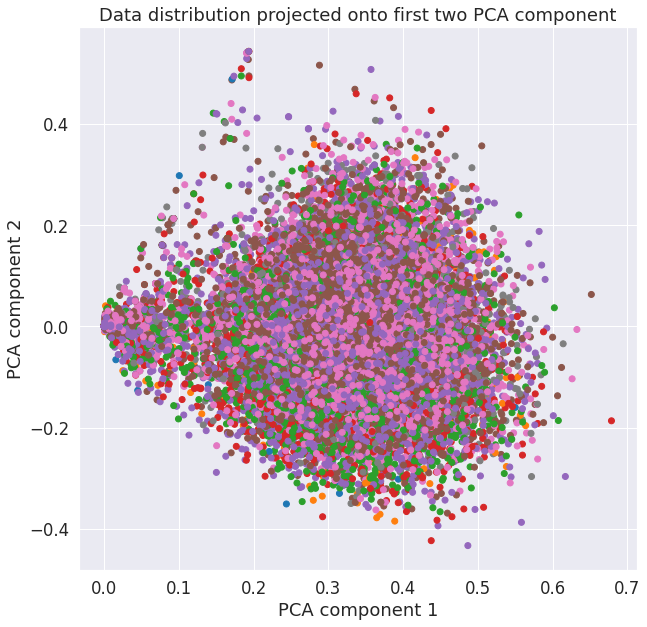

In [0]:
plt.figure(figsize=(10,10))
plt.scatter(tfidf_lsa[:,0], tfidf_lsa[:,1],c=review_pd['rating_score'],cmap='tab10')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title("Data distribution projected onto first two PCA component")
plt.show()

Analyzing the projection of data onto PCA component, we find some interesting patterns:
1. Component 0 mostly contains large postive review comments mostly describing the hotel property features like kitchen, room, breakfast, location, airconditioningm internet access etc
2. Component 2 mostly refers to good hotel location; similarly component 4 also shows the same along with reviews on staff and location
3. Component 6 reviews has some negative sentiment keywords like disappointing, noisy, wrong, fussy but overall positive comments 

In [0]:
#Looking at what sorts of paragraphs our solution considers similar, for the frist ten identified topics
paras_by_component=pd.DataFrame(tfidf_lsa,index=review_pd["Review"])
for i in range(10):
    print('-------COMPONENT {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])
    print("-------------------------------------------------------------")

-------COMPONENT 0:
Review
 I've had grander PRICEWe booked our holiday with Virgin which included the flights transfers and hotel so I cannot give a complete accurate guide to price but I would say from looking at their website and the amount we paid its safe to say its about \xa3130 a night for two on a weekend and about \xa390 a night on a weeknight for two LOCATIONThe Grand Hyatt is in an excellent location if you wish to explore the whole of New York as it is situated next door to Grand Central Station but not so great if you are only there for the shopping as were we It wasn't as much the distance to get to places it was the volume of people you would have to battle to get to the places you wanted to be To get to Times Square you would be looking at a 30 minute walk at night but early in the morning about 15 minutes when there were less people To get to attractions such as the Empire State building and 5Th Avenue it wouldn't take as long or be so hectic as you could walk across a

In [0]:
for inx in range(10):
  x = " ".join(paras_by_component.loc[:,inx].sort_values(ascending=False)[0:10].index)
  nlp_x = nlp(x)
  print ("Most frequenct Key works from PCA {} is {}".format(inx," ".join([ind[0] for ind in word_frequencies(nlp_x).most_common(100)])))

Most frequenct Key works from PCA 0 is the and a to was you of in is it I for we room were The hotel with but on that n't have as very at had are there or We from so get nice which would be all our not if this did your also out they about only really up good great can an just could area rooms us There $ 's when no one around clean will \x96 New walk take some bed here t It time floor go York who breakfast night large my staff people right 5 do stay place bathroom comfortable day service 2
Most frequenct Key works from PCA 1 is   New York in 10 Hotel a Me encanta 2009 Our hotel Tage Guter Ausgangspunkt f\xfcr Reisende Herrliches kleines i m sch\xf6nsten Stadtteil von Charme e Cortesia Mitten 41 Casa nostra per giorni le vrai
Most frequenct Key works from PCA 2 is   Good good location Hotel hotel great Location Very A in a not so Not Great Really
Most frequenct Key works from PCA 3 is   New York Hotel 10 in a Wir lieben Tage Me encanta Our hotel 2009 Guter Ausgangspunkt f\xfcr Reisende H

## 6. Predictive Modelling

For predictive test, I average the TF-IDF score across individual hotel, which will serve as an input for modelling the overall scores. In process I test 3 different regression models (supervised learning)

1. Logistic Regression
2. Random Forest Classifier
3. Gradient Boosting Classifier

Based on the available computational capacity, I will only run prediction on the single gram TFIDF. 2 gram TFIDF predictive methods requires a high computational load and crashed my session on google colab.

###1. Predictive Modelling using TFIDF Method

With 21798 review document TFIDF score, I average all the columns for a particular hotel to arrive at an average score to be used for predictive modelling

In [0]:
tfidf_train_df = pd.concat([review_pd[['Hotel_Fix','rating_score']],tfidf_df],axis = 1)

In [0]:
tfidf_train_df.head(10)

,Hotel_Fix,rating_score,aa,aaa,aarp,aback,abandoned,abbott,abc,abdomen,abeille,aber,abercrombie,abgewohnt,abilities,ability,abit,ablaze,able,aboard,aboslutely,abotu,abou,abound,abounds,abour,abrasive,abroad,abrupt,abruptly,absence,absent,absoloutely,absoloutly,absolut,absolute,absolutely,absolutey,absolutley,absolutly,...,youth,youthful,youths,youtube,ypu,yr,yrs,yuck,yucky,yuk,yukon,yum,yummiest,yummy,yup,yuppie,zabar,zabars,zagat,zara,zealand,zen,zentral,zentrales,zephyr,zero,ziggy,zillion,zillions,zimmer,zimmern,zip,zipped,zipping,zona,zone,zonked,zoo,zoom,zu
0,3 west club,4.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3 west club,4.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.092849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3 west club,4.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3 west club,4.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.158014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3 west club,4.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3 west club,4.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3 west club,4.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3 west club,4.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,414 hotel,4.178049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,414 hotel,4.178049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [0]:
# Average TFIDF Hotel 
hotel_name = tfidf_train_df['Hotel_Fix'].unique()
a = {}
for hotnm in hotel_name:
  t = tfidf_train_df[tfidf_train_df['Hotel_Fix'] == hotnm].mean(axis=0)
  a.update({hotnm : t })
tfidf_trainset_df = pd.DataFrame(a)
tfidf_trainset_df = tfidf_trainset_df.T
tfidf_trainset_df

,rating_score,aa,aaa,aarp,aback,abandoned,abbott,abc,abdomen,abeille,aber,abercrombie,abgewohnt,abilities,ability,abit,ablaze,able,aboard,aboslutely,abotu,abou,abound,abounds,abour,abrasive,abroad,abrupt,abruptly,absence,absent,absoloutely,absoloutly,absolut,absolute,absolutely,absolutey,absolutley,absolutly,absorb,...,youth,youthful,youths,youtube,ypu,yr,yrs,yuck,yucky,yuk,yukon,yum,yummiest,yummy,yup,yuppie,zabar,zabars,zagat,zara,zealand,zen,zentral,zentrales,zephyr,zero,ziggy,zillion,zillions,zimmer,zimmern,zip,zipped,zipping,zona,zone,zonked,zoo,zoom,zu
3 west club,4.600000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.031358,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
414 hotel,4.178049,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.003683,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000862,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.001623,0.003238,0.0,0.000000,0.0,0.000000,...,0.000842,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000843,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.002979,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
60 thompson,3.968293,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000859,0.0,0.002383,0.0,0.0,0.0,0.0,0.001184,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00119,0.0,0.0,0.0,0.000000,0.003457,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.001291,0.0,0.000697,0.0,0.000732,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000931,0.0,0.0,0.001105,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
6 columbus,4.251429,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003236,0.0,0.0,0.0,0.000000,0.000000,0.0,0.003303,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.005012,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.002077,0.000000,0.0,0.000000,0.0,0.001470,0.0,0.000000,0.000000,0.001844,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
70 park avenue hotel a kimpton hotel,4.167539,0.0,0.000543,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.006433,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000716,0.002215,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000455,0.000000,0.000675,0.000000,0.000000,0.0,0.000000,0.0,0.000527,0.0,0.000495,0.000000,0.000000,0.0,0.0,0.0,0.000733,0.000000,0.000000,0.0,0.000737,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000258,0.0,0.000749,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hotel 99,3.760000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive') 
#tfidf_trainset_df.to_csv('nlp_trainset_dataframe.csv')
#!cp nlp_trainset_dataframe.csv "/content/gdrive/My Drive/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
tfidf_trainset_df = pd.read_csv('/content/gdrive/My Drive/nlp_trainset_dataframe.csv')
tfidf_trainset_df

,Unnamed: 0,rating_score,aa,aaa,aarp,aback,abandoned,abbott,abc,abdomen,abeille,aber,abercrombie,abgewohnt,abilities,ability,abit,ablaze,able,aboard,aboslutely,abotu,abou,abound,abounds,abour,abrasive,abroad,abrupt,abruptly,absence,absent,absoloutely,absoloutly,absolut,absolute,absolutely,absolutey,absolutley,absolutly,...,youth,youthful,youths,youtube,ypu,yr,yrs,yuck,yucky,yuk,yukon,yum,yummiest,yummy,yup,yuppie,zabar,zabars,zagat,zara,zealand,zen,zentral,zentrales,zephyr,zero,ziggy,zillion,zillions,zimmer,zimmern,zip,zipped,zipping,zona,zone,zonked,zoo,zoom,zu
0,3 west club,4.600000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.031358,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,414 hotel,4.178049,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.003683,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000862,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.001623,0.003238,0.0,0.000000,0.0,...,0.000842,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000843,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.002979,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,60 thompson,3.968293,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000859,0.0,0.002383,0.0,0.0,0.0,0.0,0.001184,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00119,0.0,0.0,0.0,0.000000,0.003457,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.001291,0.0,0.000697,0.0,0.000732,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000931,0.0,0.0,0.001105,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,6 columbus,4.251429,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003236,0.0,0.0,0.0,0.000000,0.000000,0.0,0.003303,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.005012,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.002077,0.000000,0.0,0.000000,0.0,0.001470,0.0,0.000000,0.000000,0.001844,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,70 park avenue hotel a kimpton hotel,4.167539,0.0,0.000543,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.006433,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000716,0.002215,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000455,0.000000,0.000675,0.000000,0.000000,0.0,0.000000,0.0,0.000527,0.0,0.000495,0.000000,0.000000,0.0,0.0,0.0,0.000733,0.000000,0.000000,0.0,0.000737,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000258,0.0,0.000749,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,hotel 99,3.760000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,

Running Predictive Modelling using default setting, we observe some discrepancies in the training and test dataset scores. The training dataset score soverall seems to high > 0.90 where as the test data score are in mid 0.5 to 0.7 suggesting a case of overfitting.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

Y = tfidf_trainset_df['rating_score']
X = np.array(tfidf_trainset_df.drop(['Unnamed: 0','rating_score'],axis = 1))

# We split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

# Models
lr = LinearRegression()
rfc = RandomForestRegressor()
gbc = GradientBoostingRegressor()
#gbc = GradientBoostingClassifier()

lr.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train, y_train))
print('\nTest set score:', gbc.score(X_test, y_test))

----------------------Logistic Regression Scores----------------------
Training set score: 1.0

Test set score: 0.5952772308312696
----------------------Random Forest Scores----------------------
Training set score: 0.9132914422756442

Test set score: 0.5089528735957247
----------------------Gradient Boosting Scores----------------------
Training set score: 0.9999980537176555

Test set score: 0.7151536031795505


Grid Search CV and k fold test on random tree and gradient boosting ensemble prediction modelling may slightly improve the score but overall the overfitting is obvious .

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV
# We split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

# Models
#lr_params = {"penalty": ["l1", "l2"]}
lr_params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
lr = LinearRegression()
rfc = RandomForestRegressor()
gbc = GradientBoostingRegressor()

rfc_params = {"n_estimators": [3, 5, 10, 15],
              "max_depth": [2, 3, 4, 5],
              "min_samples_split": [2, 3, 5, 7, 9]}

gbc_params = {"n_estimators": [3, 5, 10, 15],
              "max_depth": [2, 3, 4, 5],
              "min_samples_split": [2, 3, 5, 7, 9]}

clf_lr = GridSearchCV(lr, lr_params, cv=5)
clf_lr.fit(X_train, y_train)

clf_rfc = GridSearchCV(rfc, rfc_params, cv=5)
clf_rfc.fit(X_train, y_train)

clf_gbc = GridSearchCV(gbc, gbc_params, cv=5)
clf_gbc.fit(X_train, y_train)


print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', clf_lr.score(X_train, y_train))
print('\nTest set score:', clf_lr.score(X_test, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', clf_rfc.score(X_train, y_train))
print('\nTest set score:', clf_rfc.score(X_test, y_test))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', clf_gbc.score(X_train, y_train))
print('\nTest set score:', clf_gbc.score(X_test, y_test))

----------------------Logistic Regression Scores----------------------
Training set score: 1.0

Test set score: 0.5952772308312696
----------------------Random Forest Scores----------------------
Training set score: 0.904142080675082

Test set score: 0.5952568920992192
----------------------Gradient Boosting Scores----------------------
Training set score: 0.7999667549148002

Test set score: 0.507154057642573


In [0]:
l = y_test.index.values
hotelnm = tfidf_trainset_df.loc[l,'Unnamed: 0']
pd.DataFrame({ 'Hotel': hotelnm,'Prediction LR' : clf_lr.predict(X_test), 'Prediction RF' : clf_rfc.predict(X_test), 'Prediction GBR' : clf_gbc.predict(X_test), 'Truth' : np.array(y_test)})

,Hotel,Prediction LR,Prediction RF,Prediction GBR,Truth
85,hampton inn manhattan times square south,4.189732,4.152338,4.098881,4.016000
87,helmsley middletowne hotel,3.801525,3.750610,3.896298,3.616514
88,hilton club new york,4.124565,4.239124,4.385359,4.460000
42,comfort inn manhattan bridge,4.172006,4.205094,4.167360,4.090000
62,eastgate tower,3.951741,4.209250,4.145040,4.085496
31,chambers hotel,4.021621,3.956617,4.092945,4.100000
13,americana inn,4.009704,3.866679,3.843958,3.892913
56,doubletree guest suites times square,4.192793,4.225860,4.097376,4.305648
38,club quarters midtown,3.868474,3.981315,3.964248,3.703297
8,affinia gardens,4.248231,4.266162,4.298734,4.508974


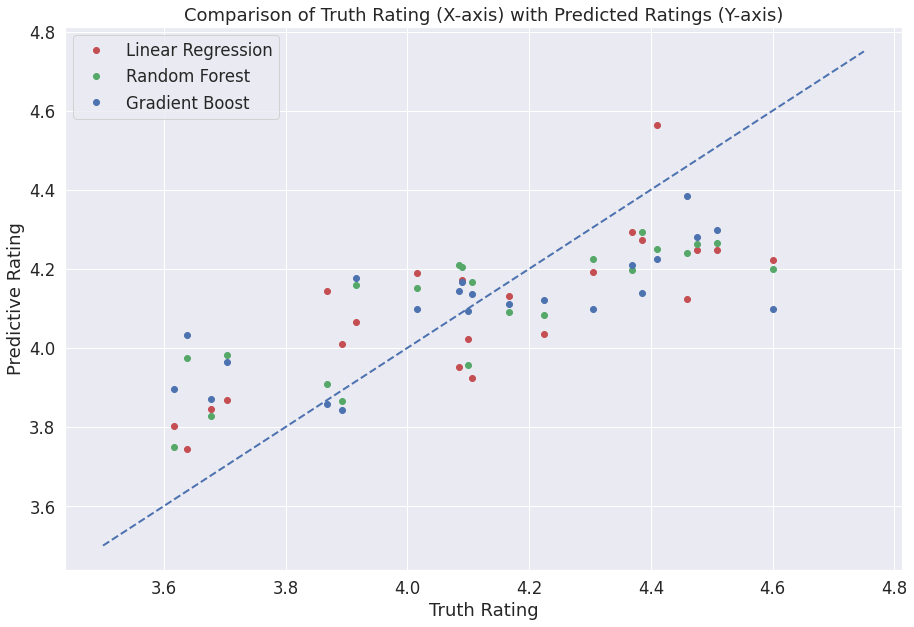

In [0]:
plt.figure(figsize = (15,10))
plt.plot([3.5,4.75],[3.5,4.75], linestyle='--', linewidth=2)
plt.plot(y_test, clf_lr.predict(X_test),'o',c='r',label = 'Linear Regression')
plt.plot(y_test, clf_rfc.predict(X_test),'o',c='g',label = 'Random Forest')
plt.plot(y_test, clf_gbc.predict(X_test),'o',c='b',label = 'Gradient Boost')
plt.xlabel('Truth Rating')
plt.ylabel('Predictive Rating')
plt.legend()
plt.title("Comparison of Truth Rating (X-axis) with Predicted Ratings (Y-axis)")
plt.show()

## Conclusion

The predictive modeling of overall rating score based on a collection of hotel reviews was able to achieve roughly 50 to 70%  accuracy based on the given dataset. The gradient boosting and random forest predictive modelling gave overall higher accuracy in comparison.

The number of hotel participating in modelling is low (110 in total). With increasing hotel, we may be able to achieve better accuracy results.

# APPENDIX

###2. Predictive Modelling using 2gram TFIDF Method'

( not enough memory to run)

In [0]:
review_pd

,Hotel,Date,Review,Review_Format,Review_Format_POS,Hotel_Fix,rating_score
0,3_west_club,Feb-27-2009,The history the class the location this hotel...,history class location hotel amazing vacation ...,NOUN NOUN NOUN NOUN ADJ NOUN NOUN PROPN PROPN ...,3 west club,4.600000
1,3_west_club,Dec-31-2008,Awesome location and a great little find We s...,awesome location great little find stayed west...,ADJ NOUN ADJ ADJ NOUN VERB PROPN PROPN PROPN N...,3 west club,4.600000
2,3_west_club,Jul-15-2008,Location Can't Be Beat We recently stayed at ...,location beat recently stayed west club wednes...,PROPN VERB ADV VERB PROPN PROPN PROPN PROPN NO...,3 west club,4.600000
3,3_west_club,Jan-27-2008,Location location location Shhhhh - don't tel...,location location location shhhhh tell best ho...,PROPN NOUN NOUN PROPN VERB PROPN NOUN NOUN PRO...,3 west club,4.600000
4,3_west_club,Sep-14-2007,Right in the middle Best location in New York...,right middle best location new york city right...,INTJ ADJ ADJ NOUN PROPN PROPN PROPN ADV SCONJ ...,3 west club,4.600000
...,...,...,...,...,...,...,...
21784,hotel_east_houston,Apr-24-2008,Small but Comfortable Hotel not too easy to f...,small comfortable hotel easy find cab driver i...,ADJ ADJ PROPN ADJ VERB NOUN NOUN NOUN ADV VERB...,hotel east houston,4.051613
21785,hotel_east_houston,Apr-7-2008,With frequent trips to the area scheduled wou...,frequent trips area scheduled stay size rooms ...,ADJ NOUN NOUN VERB VERB NOUN NOUN VERB ADJ NOU...,hotel east houston,4.051613
21786,hotel_east_houston,Mar-23-2008,Hotel Least Houston When I booked my stay I w...,hotel houston booked stay told nicest rooms fl...,PROPN PROPN VERB NOUN VERB ADJ NOUN NOUN VERB ...,hotel east houston,4.051613
21787,hotel_east_houston,Feb-18-2008,Hotel East Houston - a nice little NYC oasis ...,hotel east houston nice little nyc oasis new s...,PROPN PROPN PROPN ADJ ADJ PROPN NOUN ADJ ADJ N...,hotel east houston,4.051613


In [0]:
from google.colab import drive 
drive.mount('/content/gdrive') 
review_pd = pd.read_csv('/content/gdrive/My Drive/nlp_hotel_review_processed_dataframe.csv')
review_pd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Unnamed: 0,Hotel,Date,Review,Review_Format,Review_Format_POS,Hotel_Fix,rating_score
0,0,3_west_club,Feb-27-2009,The history the class the location this hotel...,history class location hotel amazing vacation ...,NOUN NOUN NOUN NOUN ADJ NOUN NOUN PROPN PROPN ...,3 west club,4.600000
1,1,3_west_club,Dec-31-2008,Awesome location and a great little find We s...,awesome location great little find stayed west...,ADJ NOUN ADJ ADJ NOUN VERB PROPN PROPN PROPN N...,3 west club,4.600000
2,2,3_west_club,Jul-15-2008,Location Can't Be Beat We recently stayed at ...,location beat recently stayed west club wednes...,PROPN VERB ADV VERB PROPN PROPN PROPN PROPN NO...,3 west club,4.600000
3,3,3_west_club,Jan-27-2008,Location location location Shhhhh - don't tel...,location location location shhhhh tell best ho...,PROPN NOUN NOUN PROPN VERB PROPN NOUN NOUN PRO...,3 west club,4.600000
4,4,3_west_club,Sep-14-2007,Right in the middle Best location in New York...,right middle best location new york city right...,INTJ ADJ ADJ NOUN PROPN PROPN PROPN ADV SCONJ ...,3 west club,4.600000
...,...,...,...,...,...,...,...,...
21784,21784,hotel_east_houston,Apr-24-2008,Small but Comfortable Hotel not too easy to f...,small comfortable hotel easy find cab driver i...,ADJ ADJ PROPN ADJ VERB NOUN NOUN NOUN ADV VERB...,hotel east houston,4.051613
21785,21785,hotel_east_houston,Apr-7-2008,With frequent trips to the area scheduled wou...,frequent trips area scheduled stay size rooms ...,ADJ NOUN NOUN VERB VERB NOUN NOUN VERB ADJ NOU...,hotel east houston,4.051613
21786,21786,hotel_east_houston,Mar-23-2008,Hotel Least Houston When I booked my stay I w...,hotel houston booked stay told nicest rooms fl...,PROPN PROPN VERB NOUN VERB ADJ NOUN NOUN VERB ...,hotel east houston,4.051613
21787,21787,hotel_east_houston,Feb-18-2008,Hotel East Houston - a nice little NYC oasis ...,hotel east houston nice little nyc oasis new s...,PROPN PROPN PROPN ADJ ADJ PROPN NOUN ADJ ADJ N...,hotel east houston,4.051613


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, lowercase=True, use_idf=True, norm=u'l2', smooth_idf=True,ngram_range=(2,2))
# applying the vectorizer
X = vectorizer.fit_transform(review_pd["Review_Format"])
tfidf_2grm_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [0]:
tfidf_2grm_train_df = pd.concat([review_pd[['Hotel_Fix','rating_score']],tfidf_2grm_df],axis = 1)

# Average TFIDF 2gram Hotel 
hotel_name = tfidf_2grm_train_df['Hotel_Fix'].unique()
a = {}
for hotnm in hotel_name:
  t = tfidf_2grm_train_df[tfidf_2grm_train_df['Hotel_Fix'] == hotnm].mean(axis=0)
  a.update({hotnm : t })
tfidf_2grm_trainset_df = pd.DataFrame(a)
tfidf_2grm_trainset_df = tfidf_2grm_trainset_df.T
tfidf_2grm_trainset_df

In [0]:
Y = tfidf_2grm_trainset_df['rating_score']
X = np.array(tfidf_2grm_trainset_df.drop('rating_score',axis = 1))

# We split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

# Models
lr = LinearRegression()
rfc = RandomForestRegressor()
gbc = GradientBoostingRegressor()
#gbc = GradientBoostingClassifier()

lr.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train, y_train))
print('\nTest set score:', gbc.score(X_test, y_test))

In [0]:
from sklearn.model_selection import train_test_split
# We split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

# Models
lr_params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
lr = LogisticRegression()

rfc_params = {"n_estimators": [3, 5, 10, 15],
              "max_depth": [2, 3, 4, 5],
              "min_samples_split": [3, 5, 7, 9]}
rfc = RandomForestClassifier()

gbc_params = {"n_estimators": [3, 5, 10, 15],
              "max_depth": [2, 3, 4, 5],
              "min_samples_split": [3, 5, 7, 9]}
gbc = GradientBoostingClassifier()

clf_lr = GridSearchCV(lr, lr_params, cv=5)
clf_lr.fit(X_train, y_train)

clf_rfc = GridSearchCV(rfc, rfc_params, cv=5)
clf_rfc.fit(X_train, y_train)

clf_gbc = GridSearchCV(gbc, gbc_params, cv=5)
clf_gbc.fit(X_train, y_train)


print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', clf_lr.score(X_train, y_train))
print('\nTest set score:', clf_lr.score(X_test, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', clf_rfc.score(X_train, y_train))
print('\nTest set score:', clf_rfc.score(X_test, y_test))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', clf_gbc.score(X_train, y_train))
print('\nTest set score:', clf_gbc.score(X_test, y_test))